In [1]:
from os import listdir
from os.path import isfile, join
import pickle
import tensorflow.keras.saving as ker_saving

In [2]:
model_base = "../models"

res = []
models = dict()

for f_name in listdir(model_base):
    path = join(model_base, f_name)
    if isfile(path):
        try:
            with open(path, 'rb') as f:
                model = pickle.load(f)
                models[f_name] = model
        except pickle.UnpicklingError:
            model = ker_saving.load_model(path)
            models[f_name] = model

In [3]:
for name, model in models.items():
    print(name)

CatBoostClassifier.pkl
LogisticRegression.pkl
nn.keras
RandomForestClassifier.pkl
TfidfVectorizer.pkl


In [4]:
tf = models['TfidfVectorizer.pkl']

In [5]:
import pandas as pd
df_parsed = pd.read_csv('../data/parsed_result.csv')

In [6]:
df_parsed.sample()

,text,isToxic
634,Llor,0.0


In [7]:
choosed_model = 'RandomForestClassifier.pkl'
model = models[choosed_model]

In [8]:
import sys, os.path
utils = (os.path.abspath(os.path.join(os.path.dirname(''), '..'))
+ '/utils')
sys.path.append(utils) # to make all utils files importable
from text_refactorer import refactor_data
from loader import import_model
from model_worker import model_predict

In [9]:
df_parsed.dropna(inplace=True)
df_parsed['text'] = refactor_data(df_parsed['text'])

In [10]:
mod_vec = import_model('../models/RandomForestClassifier.pkl','../models/TfidfVectorizer.pkl')

In [11]:
y_pred = model_predict(mod_vec, df_parsed)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  40 out of  40 | elapsed:    0.0s finished


In [12]:
from sklearn.metrics import f1_score

In [18]:
f1_score(df_parsed['isToxic'], y_pred, average='weighted')

0.743957724089159

In [19]:
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def show_model_perfection_metrics(y_test, y_pred):
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"F1: {f1:.10}")
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.show()

F1: 0.7439577241


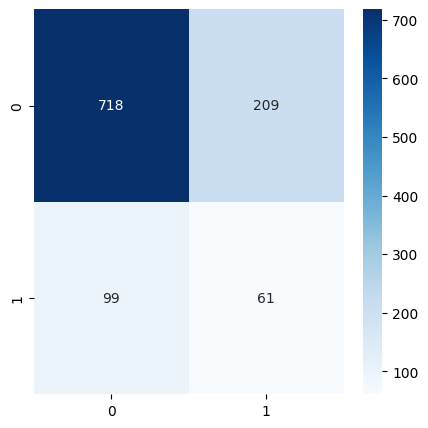

In [20]:
show_model_perfection_metrics(df_parsed['isToxic'], y_pred)